2nd attempt at making my own simple neural network!


Neural network with 1 hidden layer of size 2
Current loss: 0.14426810511569943
Inputs: [[0.1]
 [0.3]
 [0.5]
 [0.7]
 [1. ]]
Layer: [[-0.2  0.6]
 [ 0.   0.4]
 [ 0.2  0.2]
 [ 0.4  0. ]
 [ 0.7 -0.3]]
Layer: [[-0.01   0.6  ]
 [ 0.     0.4  ]
 [ 0.2    0.2  ]
 [ 0.4    0.   ]
 [ 0.7   -0.015]]
Outputs: [[0.3599]
 [0.2455]
 [0.2911]
 [0.3366]
 [0.5799]]
Outputs: [[0.3599]
 [0.2455]
 [0.2911]
 [0.3366]
 [0.5799]]
Weights1: [[ 1. -1.]]
Bias1: [[-0.3  0.7]]
Weights2: [[0.8416]
 [0.6138]]
Bias2: [0.]
learnt weights2 [[0.2369]
 [0.3128]]
learnt bias2 [1.0122]
old d_weights1 = [[1.3933 0.5032]]
dSSR/dPredicted = [[1.2802]
 [0.5089]
 [0.4178]
 [0.3268]
 [0.8402]]
dPredicted/dY2 = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
dSSR/dY2 = [[1.2802]
 [0.5089]
 [0.4178]
 [0.3268]
 [0.8402]]
dY2/dX2 = [[1.0784]
 [0.9266]]
dX2/dY1 = [[0.05 1.  ]
 [0.05 1.  ]
 [1.   1.  ]
 [1.   0.05]
 [1.   0.05]]
dSSR/dY1 = [[1.8056]
 [2.0992]]
dY1/dw1 = [[0.1]
 [0.3]
 [0.5]
 [0.7]
 [1. ]]
new d_weights1 = [[1.3933 0.5032]]
learnt weig

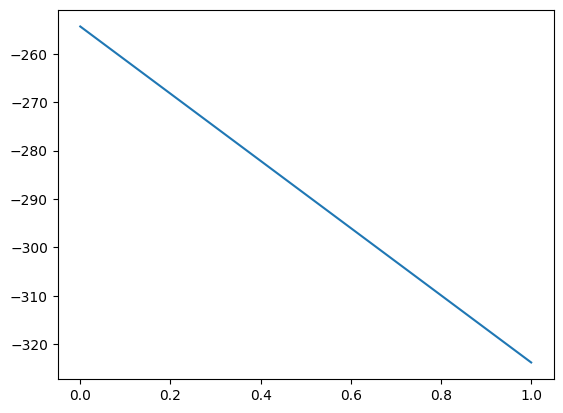

In [48]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

leaky = 0.05

def relu(x):
    return np.where(x > 0, x, x * leaky)

def relu_derivative(x):
    return np.where(x > 0, 1, leaky)

activation = relu
d_activation = relu_derivative

np.set_printoptions(precision=4, linewidth=200)

class NeuralNet:
    # What is the type of x and y???
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.input = self.x
        # self.weights1 = np.random.rand(x.shape[1], 2)
        # self.bias1 = np.zeros(2)
        self.weights2 = np.random.rand(2, 1)
        self.bias2 = np.zeros(1)
        self.weights1 = np.array([[1.0, -1.0]])
        self.bias1 = np.array([[-0.3, 0.7]])
        # self.weights2 = np.array([[1.0], [1.0]])
        # self.bias2 = np.array([[0.0]])
        self.output = np.zeros(self.y.shape)
        self.learning_rate = 0.3

    def feedforward(self):
        self.layer1z = np.dot(self.input, self.weights1) + self.bias1
        self.layer1 = activation(np.dot(self.input, self.weights1) + self.bias1)
        self.outputz = np.dot(self.layer1, self.weights2) + self.bias2
        self.output = activation(np.dot(self.layer1, self.weights2) + self.bias2)

    def backpropagate(self):
        dSSR_dY2 = -2*(self.output - self.y) * d_activation(self.outputz)
        d_weights2 = np.dot(self.layer1.T, dSSR_dY2)
        # print(f"dSSR/dPredicted = {-2*(self.output - self.y)}")
        # print(f"dPredicted/dY = {d_activation(self.outputz)}")  # Y is output of layer1, aka L[i]
        # print(f"dSSR/dY2 = {2*(self.y - self.output) * d_activation(self.outputz)}")
        # print(f"dY2/dw2 = {self.layer1.T}")
        d_bias2 = np.sum(dSSR_dY2, axis=0)
        self.weights2 += d_weights2 * self.learning_rate
        self.bias2 += d_bias2 * self.learning_rate / 2
        print(f"learnt weights2 {d_weights2 * self.learning_rate}")
        print(f"learnt bias2 {d_bias2 * self.learning_rate}")

        # dSSR/dPredicted = [[0.]
        #  [2.]
        #  [0.]]
        # dPredicted/dY = [[-3.1]
        #  [-3.2]]
        # dY/dX = [[1. 1.]
        #  [1. 1.]
        #  [1. 1.]]
        # dX/dw1 = [[0. ]
        #  [0.5]
        #  [1. ]]

        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * d_activation(self.outputz), self.weights2.T) * d_activation(self.layer1)))
        print(f"old d_weights1 = {d_weights1}")
        dSSR_dY1 = np.dot(d_activation(self.layer1z).T, dSSR_dY2) * self.weights2
        print(f"dSSR/dPredicted = {-2*(self.output - self.y)}")
        print(f"dPredicted/dY2 = {d_activation(self.outputz)}")  # Y2 is output
        print(f"dSSR/dY2 = {dSSR_dY2}")
        print(f"dY2/dX2 = {self.weights2}")  # X2 is input to 2nd calculation, aka layer1
        print(f"dX2/dY1 = {d_activation(self.layer1z)}")
        print(f"dSSR/dY1 = {dSSR_dY1}")
        print(f"dY1/dw1 = {self.input}")
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * d_activation(self.outputz), self.weights2.T) * d_activation(self.layer1)))
        print(f"new d_weights1 = {d_weights1}")
        d_bias1 = np.sum(dSSR_dY1, axis=0)


        self.weights1 += d_weights1 * self.learning_rate
        self.bias1 += d_bias1 * self.learning_rate
        print(f"learnt weights1 {d_weights1 * self.learning_rate}")
        print(f"learnt bias1 {d_bias1 * self.learning_rate}")

    def display(self):
        print()
        print("Neural network with 1 hidden layer of size 2")
        print(f"Current loss: {self.loss()}")
        print(f"Inputs: {self.input}")
        print(f"Layer: {self.layer1z}")
        print(f"Layer: {self.layer1}")
        print(f"Outputs: {self.outputz}")
        print(f"Outputs: {self.output}")
        print(f"Weights1: {self.weights1}")
        print(f"Bias1: {self.bias1}")
        print(f"Weights2: {self.weights2}")
        print(f"Bias2: {self.bias2}")

    def test(self, inputs):
        #print(f"layer1 z = {np.dot(inputs, self.weights1) + self.bias1}")
        layer1 = activation(np.dot(inputs, self.weights1) + self.bias1)
        #print(f"layer1 = {self.layer1}")
        #print(f"output z = {np.dot(self.layer1, self.weights2) + self.bias2}")
        output = activation(np.dot(layer1, self.weights2) + self.bias2)
        #print(f"output = {self.output}")
        return output

    def loss(self):
        return np.average((self.y - self.output) ** 2)

    def mean_of_square_errors(predicted, actual):
        if len(predicted) != len(actual):
            sys.exit("mean_of_square_errors: Predict and actual are different length")
        sum = 0
        for i in range(len(predicted)):
            sum += (predicted[i] - actual[i]) ** 2
        return sum / len(predicted)

# Add function to plot shape of x vs y
def plot(nn):
    x = np.linspace(0, 1)
    y = nn.test(np.array(x)[np.newaxis].T)
    plt.plot(x,y)

x = np.array([ [0.1], [0.3], [0.5], [0.7], [1.0] ])
y = np.array([ [1.0], [0.5], [0.5], [0.5], [1.0] ])
# x = np.array([ [0.1], [0.5], [1.0] ])
# y = np.array([ [1.0], [0.5], [1.0] ])
# x = np.array([ [0.5] ])
# y = np.array([ [1.0] ])

nn = NeuralNet(x,y)

nn.feedforward()
nn.display()
for i in range(2):
    nn.backpropagate()
    nn.feedforward()
    print(f"\nTesting epoch #{i+1}")
    nn.display()
    if nn.loss() < 0.01:
        break

plot(nn)
